# Overview
Use this notebook to convert an OCT image you have to a virtual H&E image for evaluation.

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/zero_shot_segmentation/blob/main/segmentation_status.ipynb)
 and run.


In [ ]:
#how many virtual images to sample from the list of legitimate images?
n_samples = 5

In [ ]:
list_of_legit_images = [""]

# inputs

In [ ]:
#segment anything (sam)
using_colab = True
visualize_sam_outputs = True

#sam algorithm input parameters
points_per_side=32
pred_iou_thresh=0.90
stability_score_thresh=0.95
crop_n_layers=1
crop_n_points_downscale_factor=2
min_mask_region_area=3000

#sam model type and weights checkpoint
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

In [ ]:
FIG_SIZE = (5,5)

In [ ]:
#rf - roboflow dataset related params
rf_api_key="R04BinsZcBZ6PsfKR2fP"
rf_workspace="yolab-kmmfx"
rf_project = "connect_from_colab"
rf_dataset = "png-mask-semantic"

#Zero shot pipeline

In [ ]:
import torch
import torchvision
import os

#go back to initial dir
%cd "/content"
!git clone --recurse-submodules https://github.com/WinetraubLab/zero_shot_segmentation.git
# Clone repository, run setup on first load
if not 'setup_env_oct2Hist_usemodel' in globals():
  setup_env_oct2Hist_usemodel = True
  !git clone --recurse-submodules https://github.com/WinetraubLab/OCT2Hist-UseModel
  %run /content/OCT2Hist-UseModel/setup_env.ipynb
%run /content/zero_shot_segmentation/setup_roboflow_and_sam.ipynb
from IPython.display import clear_output
clear_output()

/content
fatal: destination path 'zero_shot_segmentation' already exists and is not an empty directory.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to connect_from_colab-1 in png-mask-semantic:: 100%|██████████| 6/6 [00:00<00:00, 2487.48it/s]


/content/connect_from_colab-1/test
/content/connect_from_colab-1/test/_annotations.coco.json
PyTorch version: 2.0.1+cu118
Torchvision version: 0.15.2+cu118
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ui7v4jym
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ui7v4jym
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=0c32bbf6c68671b753f4fb25c7d43ea1798b2f1f9918de5e03e5b2bce21d1fa0
  Stored in directory: /tmp/pip-ephem-wheel-cache-2_lmxx14/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2023-09-07 19:36:59--  https://pbs.twimg.com/media/FvpQj7UWYAAgxfo?format=jpg
Resolving pb

NameError: ignored

NameError: ignored

In [ ]:
%pip install dataclasses-json
%pip install supervision
from IPython.display import clear_output
clear_output()

In [ ]:
from zero_shot_segmentation.zero_shot_utils.utils import *

#run sam on virtual histology

## Environment Set-up

In [ ]:
%run /content/zero_shot_segmentation/setup_roboflow_and_sam.ipynb
from IPython.display import clear_output
clear_output()
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=10,
    pred_iou_thresh=0.95,
    stability_score_thresh=0.95,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=500,  # Requires open-cv to run post-processing
)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to connect_from_colab-1 in png-mask-semantic:: 100%|██████████| 6/6 [00:00<00:00, 723.78it/s]


/content/connect_from_colab-1/test
/content/connect_from_colab-1/test/_annotations.coco.json
PyTorch version: 2.0.1+cu118
Torchvision version: 0.15.2+cu118
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-4wunc0yr
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-4wunc0yr
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
mkdir: cannot create directory ‘images’: File exists
--2023-09-07 19:45:48--  https://pbs.twimg.com/media/FvpQj7UWYAAgxfo?format=jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 146.75.112.159, 2606:2800:248:1707:10d3:19d0:1ba2:1a23
Connecting to pbs.twimg.com (pbs.twimg.com)|146.75.112.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254202 (248K) [image/jpeg]
Saving to: ‘images/FvpQj7UWYAAg

NameError: ignored

NameError: ignored

To generate masks, just run `generate` on an image.

In [ ]:
import cv2
titles = ["input oct", "input vhist", "masked_oct, based on input vhist"]
for oct_path, vhist_path in list_of_legit_images:
  input_vhist = cv2.imread(vhist_input_image_path)
  input_oct = cv2.imread(vhist_input_image_path)
  output_masks = mask_generator.generate(input_vhist)
  showThreeImgs(input_oct, input_vhist, input_oct, masks = output_masks, titles = titles):

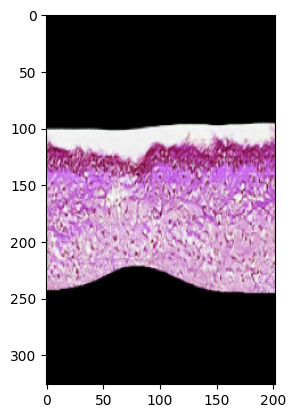

In [ ]:
from utils.show_images import *
showImg(input)

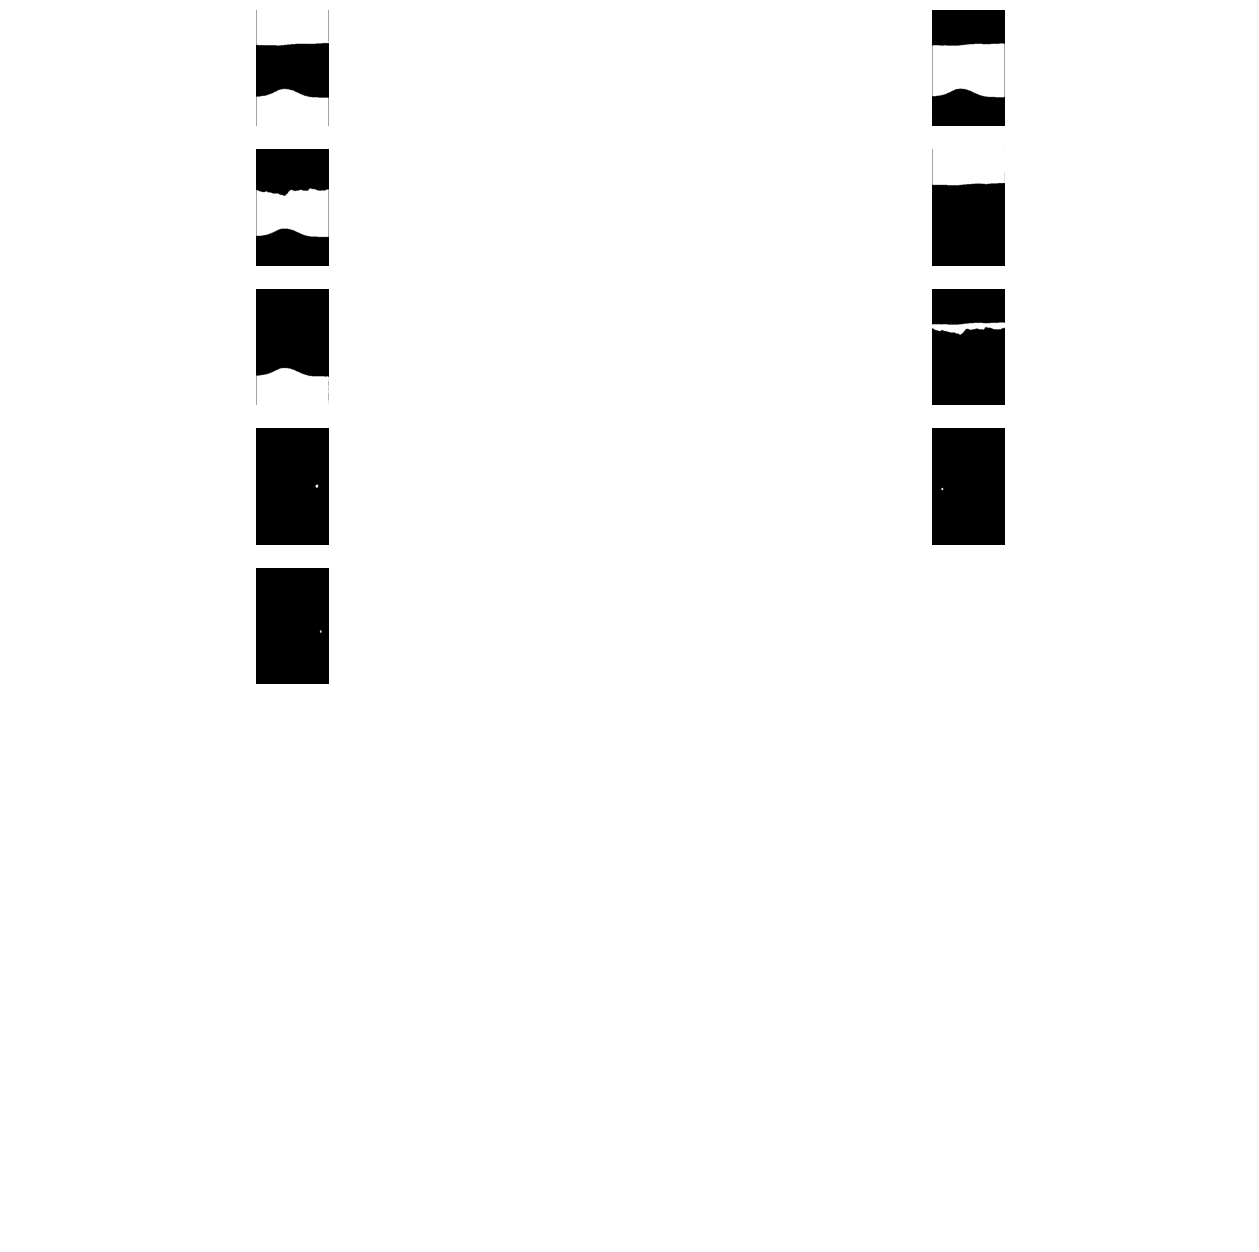

In [ ]:
if visualize_sam_outputs:
  visualize_masks(masks)

Mask generation returns a list over masks, where each mask is a dictionary containing various data about the mask. These keys are:
* `segmentation` : the mask
* `area` : the area of the mask in pixels
* `bbox` : the boundary box of the mask in XYWH format
* `predicted_iou` : the model's own prediction for the quality of the mask
* `point_coords` : the sampled input point that generated this mask
* `stability_score` : an additional measure of mask quality
* `crop_box` : the crop of the image used to generate this mask in XYWH format

Show all the masks overlayed on the image.

## Automatic mask generation options

There are several tunable parameters in automatic mask generation that control how densely points are sampled and what the thresholds are for removing low quality or duplicate masks. Additionally, generation can be automatically run on crops of the image to get improved performance on smaller objects, and post-processing can remove stray pixels and holes. Here is an example configuration that samples more masks:[link text](https://)


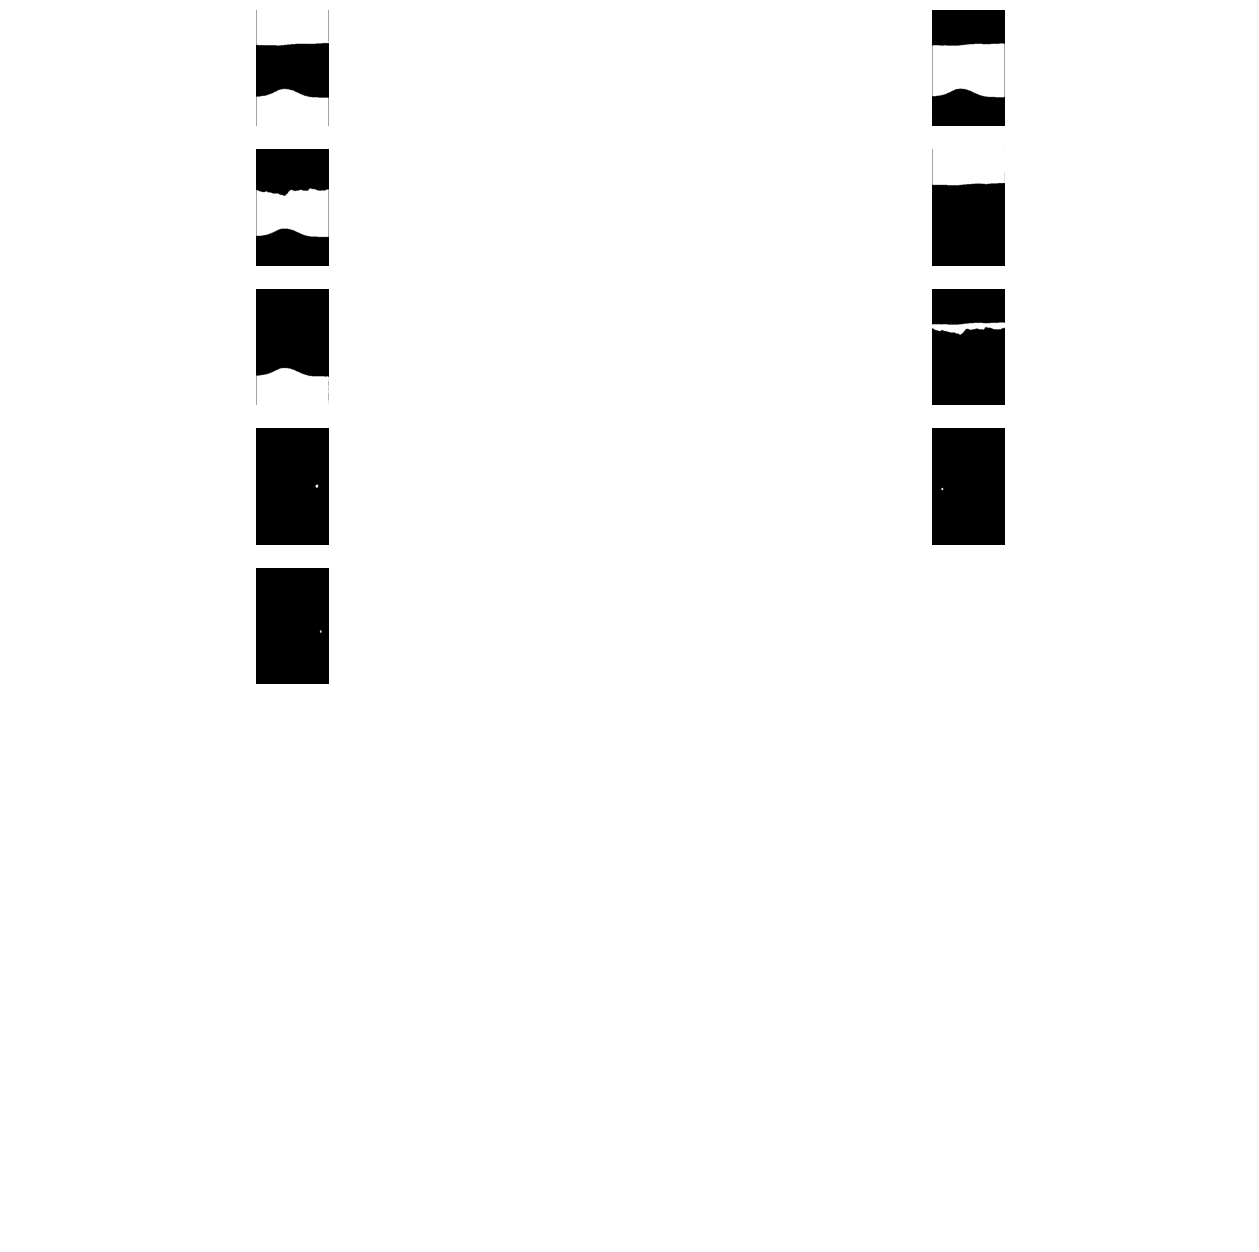

In [ ]:
if visualize_sam_outputs:
  visualize_masks(masks)

#project on oct

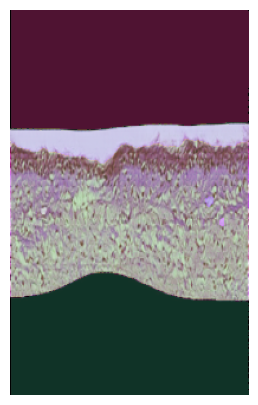

In [ ]:
visualize_masks_on_img(input, masks, FIG_SIZE)

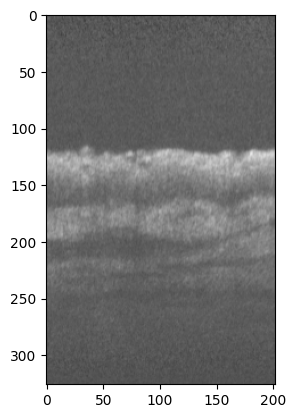

In [ ]:
oct_input = cv2.imread(oct_input_image_path)
showImg(oct_input)

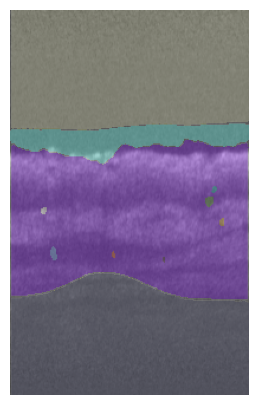

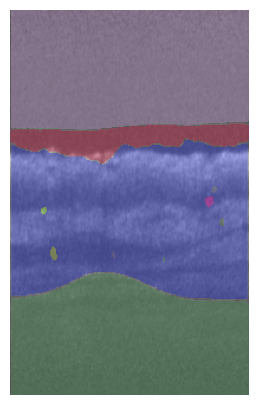

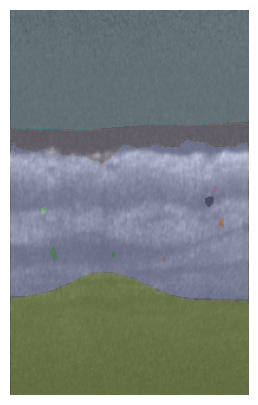

In [ ]:
for points_per_side in [10,15,20]:
  mask_generator_2 = SamAutomaticMaskGenerator(
      model=sam,
      points_per_side=32,
      pred_iou_thresh=0.86,
      stability_score_thresh=0.92,
      crop_n_layers=1,
      crop_n_points_downscale_factor=2,
      min_mask_region_area=500,  # Requires open-cv to run post-processing
  )
  masks2 = mask_generator_2.generate(input)
  visualize_masks_on_img(oct_input, masks2, FIG_SIZE)

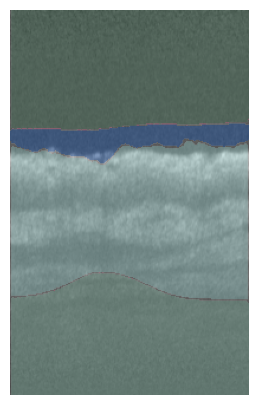

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=10,
    pred_iou_thresh=0.95,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=500,  # Requires open-cv to run post-processing
)
masks2 = mask_generator_2.generate(input)
visualize_masks_on_img(oct_input, masks2, FIG_SIZE)

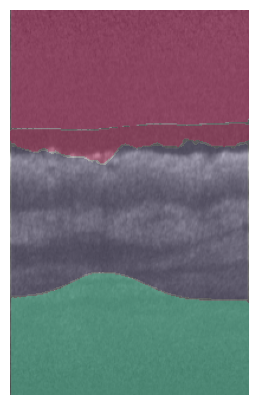

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=10,
    pred_iou_thresh=0.95,
    stability_score_thresh=0.95,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=500,  # Requires open-cv to run post-processing
)
masks2 = mask_generator_2.generate(input)
visualize_masks_on_img(oct_input, masks2, FIG_SIZE)

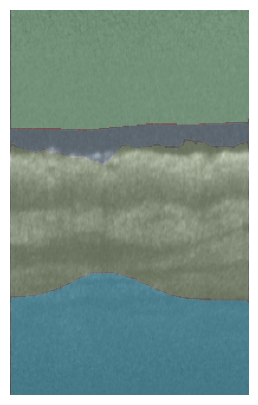

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=10,
    pred_iou_thresh=0.95,
    stability_score_thresh=0.95,
    crop_n_layers=1,
    crop_n_points_downscale_factor=4,
    min_mask_region_area=500,  # Requires open-cv to run post-processing
)
masks2 = mask_generator_2.generate(input)
visualize_masks_on_img(oct_input, masks2, FIG_SIZE)

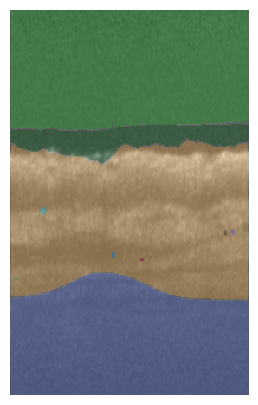

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=100,
    pred_iou_thresh=0.95,
    stability_score_thresh=0.95,
    crop_n_layers=4,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=500,  # Requires open-cv to run post-processing
)
masks2 = mask_generator_2.generate(input)
visualize_masks_on_img(oct_input, masks2, FIG_SIZE)

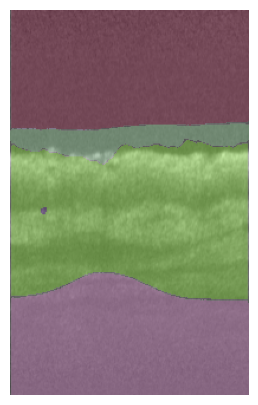

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=100,
    pred_iou_thresh=0.95,
    stability_score_thresh=0.95,
    crop_n_layers=1,
    crop_n_points_downscale_factor=4,
    min_mask_region_area=500,  # Requires open-cv to run post-processing
)
masks2 = mask_generator_2.generate(input)
visualize_masks_on_img(oct_input, masks2, FIG_SIZE)

In [ ]:
from copy import deepcopy
input_copy = deepcopy(input)
#mask out the pixels that are part of the skin delineation.
input_copy[masks[4]['segmentation'] == True] = 0

In [ ]:
import cv2
import numpy as np

# Load your color image
image = virtual_histology_image_resized

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Convert to float32
pixels = np.float32(pixels)

# Define the number of clusters (colors) you want
num_clusters = 4

# Define criteria for k-means algorithm convergence
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Apply k-means clustering
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to 8-bit values
centers = np.uint8(centers)

# Map each pixel to its corresponding cluster center
quantized_image = centers[labels.flatten()]

# Reshape the quantized image back to its original shape
quantized_image = quantized_image.reshape(image.shape)

# Display the quantized image
showImg(quantized_image)

In [ ]:
showTwoImgs(quantized_image, virtual_histology_image_resized)

In [ ]:
import cv2
import numpy as np

# Load your blue image with a white circle in the middle
image = quantized_image


# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a binary mask
ret, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Find contours in the binary mask
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image
filled_image = np.copy(image)

# Iterate over each contour and fill it with the surrounding color
for contour in contours:
    # Get the average color inside the contour
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
    mean_color = cv2.mean(image, mask=mask)[:3]  # Get the BGR color values

    # Fill the contour with the mean color
    cv2.drawContours(filled_image, [contour], -1, mean_color, thickness=cv2.FILLED)


In [ ]:
masks = mask_generator.generate(quantized_image)

In [ ]:
showImg(filled_image)

In [ ]:
visualize_masks_on_img(quantized_image, masks, FIG_SIZE)